Import Pandas and Numpy libraries. These are the main libraries for array computations.

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

Define the data root to be take train data from.

In [2]:
DATA_ROOT = './data/'

Load the train and test data using read_csv function in the Pandas library.

In [3]:
train_data = pd.read_csv(DATA_ROOT + 'train.csv')
test_data = pd.read_csv(DATA_ROOT + 'test.csv')

A function to separate the different outputs of each section. This will be used to display the data in the terminal in a readable way.

In [4]:
def separate_output(str):
    '''
        Displays an string as an argument in a clear form
    '''
    SHARP_COUNT = 100
    print('\n')
    for i in range(SHARP_COUNT):
        if(i == SHARP_COUNT-1):
            print("#")
        else:
            print("#", end="")

    # Display info at the center
    for i in range(int((SHARP_COUNT/2-len(str)/2))):
        print("",end=" ")

    print(str)

    for i in range(SHARP_COUNT):
        print("#", end="")
    print('\n')

Find out how the data looks like. This helps us to get an intuition of features inside the datasets. This is done using the shape class member of a Pandas dataframe.

In [5]:
separate_output("Train/Test Shapes")
print(train_data.shape)
print(test_data.shape)



####################################################################################################
                                         Train/Test Shapes
####################################################################################################

(891, 12)
(418, 11)


This will provide some statistical knowledge about the data. We can observe the mean, variance, max and minimum of data for each feature. This can be used for data normalization and preprocessing. We have used the describe method from the Pandas dataframe class.

In [6]:
separate_output("General Data Knowledge")
train_data.describe()



####################################################################################################
                                       General Data Knowledge
####################################################################################################



,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Some features like PassengerId, Name, Ticket, Cavbin and Embarked can be removed from the dataset.

In [7]:
# These columns will be dropped
DROPPED_COLS = ['PassengerId',
                'Ticket',
                'Cabin',
                'Embarked']

# Drop the PassengerId column
train_data.drop(DROPPED_COLS, axis=1, inplace=True)

In [8]:
# Get the shape of data
separate_output("Train/Test Shapes -- Dropped 5 Columns")
print(train_data.shape)
print(test_data.shape)



####################################################################################################
                               Train/Test Shapes -- Dropped 5 Columns
####################################################################################################

(891, 8)
(418, 11)


Let's plot the pie chart of the sex. We want to analyze if the gender affects the survivals or not. At the first glance, it seems that gender could be a good feature for prediction. These plots confirm this idea.

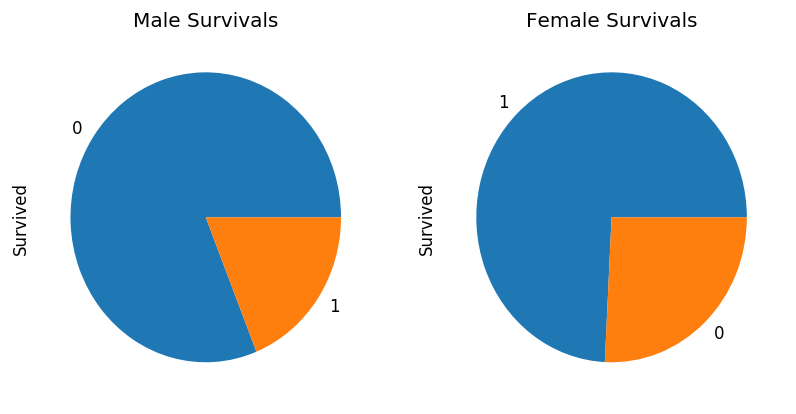

In [9]:
import matplotlib.pyplot as plt

# Check if the gender affect the survivals
# Plot the figures for male and female
fig = plt.figure(figsize=(8, 4), dpi=120, facecolor='w', edgecolor='k')
fig.canvas.set_window_title("Analaysis of Gender Effect on Survivals")

male_survival = fig.add_subplot(121)
train_data.Survived[train_data['Sex'] == 'male'].value_counts().plot(kind='pie')
male_survival.set_title("Male Survivals")

female_survival = fig.add_subplot(122)
train_data.Survived[train_data['Sex'] == 'female'].value_counts().plot(kind='pie')
female_survival.set_title("Female Survivals")
plt.show()

Let's check the datatypes to make sure there are no more objects left in the dataset. Objects are representing a text most of the times(Categorical Data). We obtain this using select_dtypes from the Pandas Dataframe class.

In [10]:
# Let's see if there are any more categorical data left
separate_output("Datatypes")
print(train_data.select_dtypes(include=[object]))



####################################################################################################
                                             Datatypes
####################################################################################################

                                                  Name     Sex
0                              Braund, Mr. Owen Harris    male
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female
2                               Heikkinen, Miss. Laina  female
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female
4                             Allen, Mr. William Henry    male
5                                     Moran, Mr. James    male
6                              McCarthy, Mr. Timothy J    male
7                       Palsson, Master. Gosta Leonard    male
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female
9                  Nasser, Mrs. Nicholas (Adele Achem)  female
10                     Sandstrom, Miss. Marguer

We use LabelEncoder to convert the categorical data into the numerical form. To do this, simply create an object of the LabelEncoder class and call the fit_transform function on the desired data column in the dataset.

In [11]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Convert the categorical data into numerical form
train_data['Sex'] = LabelEncoder().fit_transform(train_data['Sex'])

Split the titles from the passenger names which is itself a feature but also help in calculating missing median age values.

In [12]:
train_data['Name'] = train_data['Name'].map(lambda x: x.split(',')[1].split('.')[0].strip())
titles = train_data['Name'].unique()
titles

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

Sneaking into the Age column, we can see there are some NaN numbers. These are called missing values. In order to increase the number of data samples, we need to fill these NaN values with an appropriate values. Fill the NaN values of Age using median values related to its title.

In [13]:
train_data['Age'].fillna(-1, inplace=True)

medians = dict()
for title in titles:
    median = train_data.Age[(train_data["Age"] != -1) & (train_data['Name'] == title)].median()
    medians[title] = median
    
for index, row in train_data.iterrows():
    if row['Age'] == -1:
        train_data.loc[index, 'Age'] = medians[row['Name']]
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare
0,0,3,Mr,1,22.0,1,0,7.2500
1,1,1,Mrs,0,38.0,1,0,71.2833
2,1,3,Miss,0,26.0,0,0,7.9250
3,1,1,Mrs,0,35.0,1,0,53.1000
4,0,3,Mr,1,35.0,0,0,8.0500


Before transforming the Name column into the numerical form, we'll be excavating the distribution of our training data with respect to the Names. We will assign the numbers to these Names according to the distribution of each of these titles shown below.

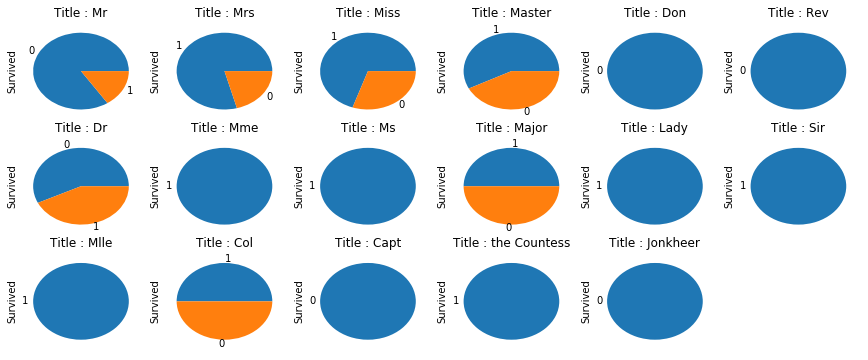

In [14]:
fig = plt.figure(figsize=(15,6))

i=1
for title in train_data['Name'].unique():
    fig.add_subplot(3, 6, i)
    plt.title('Title : {}'.format(title))
    train_data.Survived[train_data['Name'] == title].value_counts().plot(kind='pie')
    i += 1

In [15]:
REPLACEMENTS = {
    'Don': 0,
    'Rev': 0,
    'Jonkheer': 0,
    'Capt': 0,
    'Mr': 1,
    'Dr': 2,
    'Col': 3,
    'Major': 3,
    'Master': 4,
    'Miss': 5,
    'Mrs': 6,
    'Mme': 7,
    'Ms': 7,
    'Mlle': 7,
    'Sir': 7,
    'Lady': 7,
    'the Countess': 7
}

train_data['Name'] = train_data['Name'].apply(lambda x: REPLACEMENTS.get(x))

We can also fill the NaN values of Fare using by its correlation with Ticket Class.

In [16]:
train_data['Fare'].fillna(-1, inplace=True)
medians = dict()
for pclass in train_data['Pclass'].unique():
    median = train_data.Fare[(train_data["Fare"] != -1) & (train_data['Pclass'] == pclass)].median()
    medians[pclass] = median
for index, row in train_data.iterrows():
    if row['Fare'] == -1:
        train_data.loc[index, 'Fare'] = medians[row['Pclass']]

Plot the distribution of our data with respect to each class of tickets.

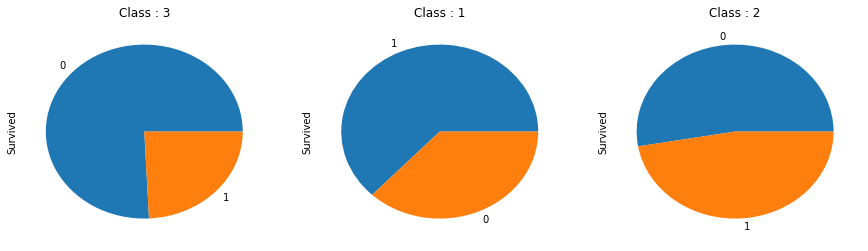

In [17]:
fig = plt.figure(figsize=(15,4))

i=1
for pclass in train_data['Pclass'].unique():
    fig.add_subplot(1, 3, i)
    plt.title('Class : {}'.format(pclass))
    train_data.Survived[train_data['Pclass'] == pclass].value_counts().plot(kind='pie')
    i += 1

The classes are numeric already. Let's analyze the next feature.

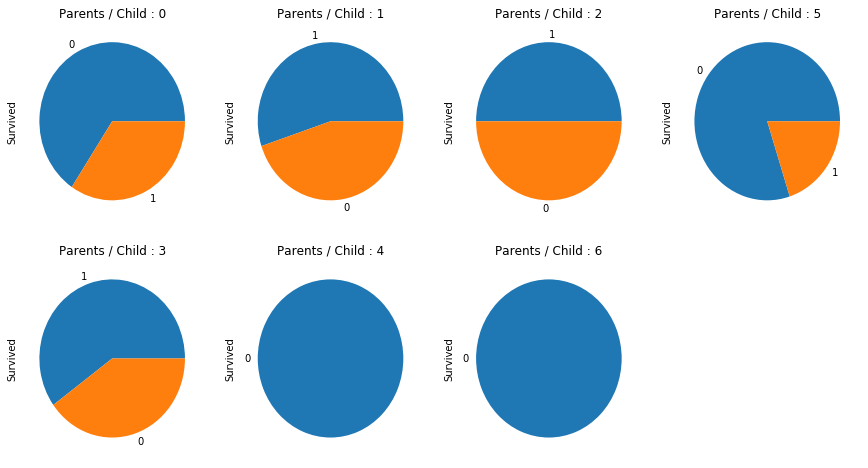

In [18]:
fig = plt.figure(figsize=(15,8))
i = 0
for parch in train_data['Parch'].unique():
    fig.add_subplot(2, 4, i+1)
    plt.title('Parents / Child : {}'.format(parch))
    train_data.Survived[train_data['Parch'] == parch].value_counts().plot(kind='pie')
    i += 1

In [19]:
CP_REPLACEMENTS = {
    6: 0,
    4: 0,
    5: 1,
    0: 2,
    2: 3,
    1: 4,
    3: 5
}
train_data['Parch'] = train_data['Parch'].apply(lambda x: CP_REPLACEMENTS.get(x))

In [20]:
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare
0,0,3,1,1,22.0,1,2,7.2500
1,1,1,6,0,38.0,1,2,71.2833
2,1,3,5,0,26.0,0,2,7.9250
3,1,1,6,0,35.0,1,2,53.1000
4,0,3,1,1,35.0,0,2,8.0500


Now the data is almost ready to be trained. We can start training using the predefined models in sklearn library. Following models are used in this example.

In [21]:
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# An array containing models
MODELS = [
    MLPClassifier(),
    AdaBoostClassifier(),
    SVC(),
    QuadraticDiscriminantAnalysis(),
    GaussianProcessClassifier()
]

Since the labels for the test_data is not available, we use train_data for both training and testing. We can use the function train_test_split to split 20% of data for test and 80% for training. The actual labels for the training set is first extracted. The Survived column is dropped. Finally, the train_test_split is called on the tranining data with respective labels.

In [22]:
from sklearn.model_selection import train_test_split

# Split the train and test data
train_labels = train_data['Survived']
train_data.drop('Survived', axis=1, inplace=True)
X_train, X_test, y_train, y_test = train_test_split(train_data, train_labels, test_size=0.2, random_state=42)

We have used the recall score and the f1 score to represent the performance of each of these classifiers. The fit functon can be called from each classifier object. It is used to train some data on that specific classifier. The predict function returns the predicted labels.

In [23]:
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

for model in MODELS:
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    rscore = recall_score(y_test, prediction)
    f1score = f1_score(y_test, prediction)
    score = model.score(X_test, y_test)
    print(score)
    print("Recall: ", rscore)
    print("F-1 Score: ", f1score)

0.8100558659217877
Recall:  0.7702702702702703
F-1 Score:  0.7702702702702703
0.7988826815642458
Recall:  0.7567567567567568
F-1 Score:  0.7567567567567567
0.7877094972067039
Recall:  0.6351351351351351
F-1 Score:  0.712121212121212
0.7932960893854749
Recall:  0.7432432432432432
F-1 Score:  0.7482993197278911
0.8044692737430168
Recall:  0.7297297297297297
F-1 Score:  0.7552447552447553
